In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Data/20200330-WHO.csv')
df

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case
0,China,82447,106,3310,4,Local transmission,0
1,Republic of Korea,9661,78,158,6,Local transmission,0
2,Australia,3966,0,16,0,Local transmission,1
3,Malaysia,2470,150,34,7,Local transmission,0
4,Japan,1866,173,54,2,Local transmission,0
...,...,...,...,...,...,...,...
198,Angola,2,0,0,0,Imported cases only,8
199,Guinea-Bissau,2,0,0,0,Imported cases only,4
200,Réunion,207,64,0,0,Local transmission,0
201,Mayotte,82,32,0,0,Local transmission,0


In [2]:
df = df[df['Country/Territory'] != 'conveyance (Diamond']

In [3]:
death_rate = df['Total Deaths']/df['Total Confirmed']*100
df['Death Rate'] = death_rate
df

c:\users\ricardo_2\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
0,China,82447,106,3310,4,Local transmission,0,4.014700
1,Republic of Korea,9661,78,158,6,Local transmission,0,1.635441
2,Australia,3966,0,16,0,Local transmission,1,0.403429
3,Malaysia,2470,150,34,7,Local transmission,0,1.376518
4,Japan,1866,173,54,2,Local transmission,0,2.893891
...,...,...,...,...,...,...,...,...
197,Liberia,3,0,0,0,Local transmission,8,0.000000
198,Angola,2,0,0,0,Imported cases only,8,0.000000
199,Guinea-Bissau,2,0,0,0,Imported cases only,4,0.000000
200,Réunion,207,64,0,0,Local transmission,0,0.000000


In [4]:
countries_infected = len(df)
print('The total number of countries infected is:',countries_infected)

The total number of countries infected is: 202


In [5]:
df = df.sort_values(by=['Death Rate'],ascending=False)

df[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
107,Sudan,6,1,2,1,Imported cases only,0,33.333333
196,Gambia,3,0,1,0,Imported cases only,1,33.333333
140,Nicaragua,4,0,1,0,Imported cases only,1,25.000000
195,Zimbabwe,5,0,1,0,Local transmission,2,20.000000
139,Guyana,5,0,1,0,Local transmission,11,20.000000
192,Cabo Verde,5,0,1,0,Imported cases only,2,20.000000
177,Niger,20,10,3,2,Local transmission,0,15.000000
153,Curaçao,7,0,1,0,Imported cases only,3,14.285714
188,Gabon,7,0,1,0,Imported cases only,2,14.285714
152,Cayman Islands,8,0,1,0,Imported cases only,4,12.500000


In [6]:
minimum_number_cases = 1000 #define the minimum number of cases here/defina o número mínimo de casos aqui

dfMinNumCases = df[df['Total Confirmed'] > minimum_number_cases]
dfMinNumCases = dfMinNumCases.reset_index(drop=True)
dfMinNumCases.index = np.arange(1, (len(dfMinNumCases)+1))

dfMinNumCases[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
1,Italy,97689,5217,10781,758,Local transmission,0,11.036043
2,Indonesia,1285,130,114,12,Local transmission,0,8.871595
3,Spain,78797,6549,6528,838,Local transmission,0,8.284579
4,Netherlands,10866,1104,771,132,Local transmission,0,7.095527
5,Iran,38309,2901,2640,123,Local transmission,0,6.891331
6,France,39642,2497,2602,291,Local transmission,0,6.563746
7,The United Kingdom,19526,2433,1228,209,Local transmission,0,6.289050
8,Philippines,1418,343,71,3,Local transmission,0,5.007052
9,China,82447,106,3310,4,Local transmission,0,4.014700
10,Belgium,10836,1702,431,78,Local transmission,0,3.977482


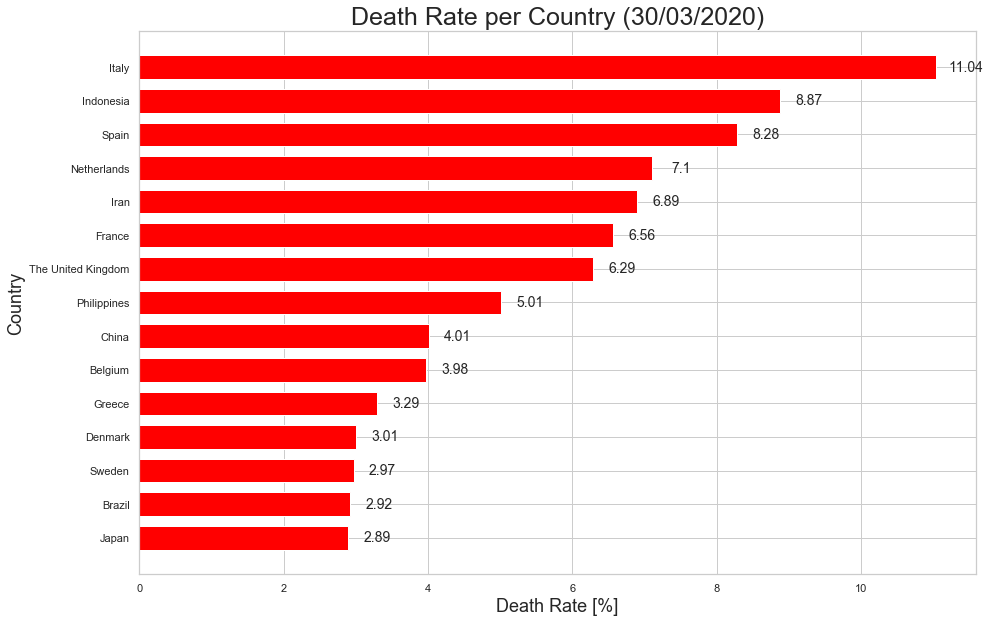

In [7]:
#matplotlib defaults
sns.set(style="whitegrid")
top15_deathrate = dfMinNumCases[0:15]
death_rate = top15_deathrate.round({'Death Rate':2})
death_rate = death_rate['Death Rate']


plt.figure(figsize=(15,10))
plt.barh(top15_deathrate['Country/Territory'],top15_deathrate['Death Rate'],height=0.7, color='red')
plt.title('Death Rate per Country (30/03/2020)',fontsize=25)
plt.xlabel('Death Rate [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.gca().invert_yaxis()
for i in range (0,15):
    plt.text(x=death_rate.iloc[i]+0.4, y=i , s=death_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
plt.show()

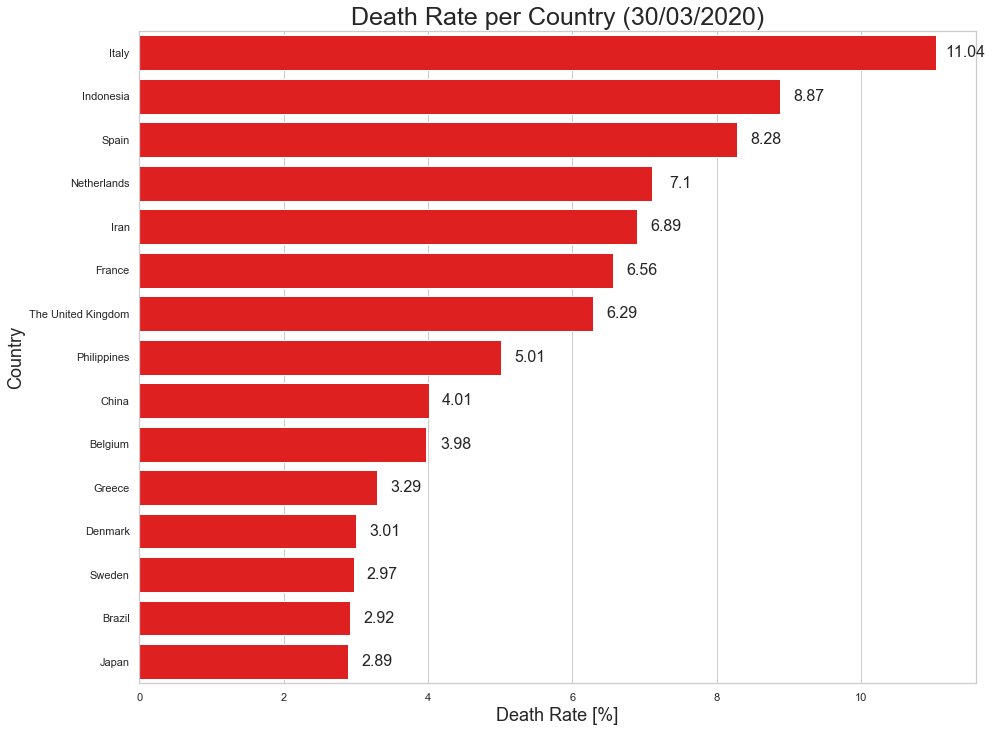

In [8]:
#seaborn defaults
f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Death Rate',y='Country/Territory', data=top15_deathrate ,
            label="Deaths", color="red")
plt.title('Death Rate per Country (30/03/2020)',fontsize=25)
plt.xlabel('Death Rate [%]',fontsize=18)
plt.ylabel('Country',fontsize=18)

for i in range (0,15):
    plt.text(x=death_rate.iloc[i]+0.4, y=i , s=death_rate.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200330_DeathRatePerCountry.png', bbox_inches='tight')
plt.show()


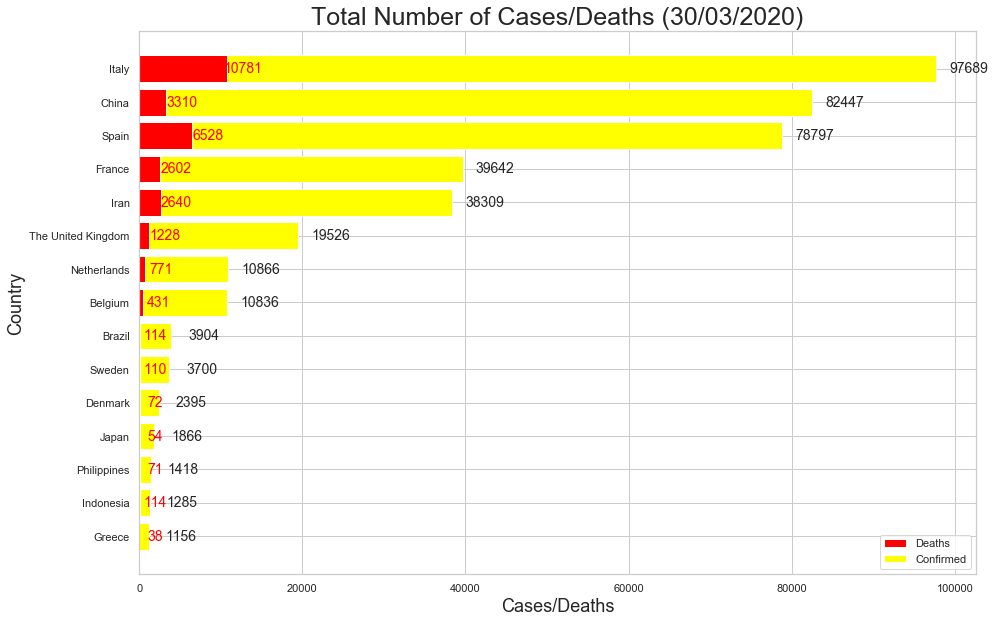

In [9]:
#matplotlib defaults
top15_confirmed = top15_deathrate.sort_values(by=['Total Confirmed'],ascending=False)
countries = np.array(top15_confirmed['Country/Territory'])
confirmed = np.array(top15_confirmed['Total Confirmed'])
deaths = np.array(top15_confirmed['Total Deaths'])
diference = confirmed - deaths

plt.figure(figsize=(15,10))
p1 = plt.barh(countries,deaths, color='red')
p2 = plt.barh(countries,diference,left=deaths, color='yellow')
plt.title('Total Number of Cases/Deaths (30/03/2020)',fontsize=25)
plt.xlabel('Cases/Deaths',fontsize=18)
plt.ylabel('Country',fontsize=18)
plt.legend((p1[0], p2[0]), ('Deaths', 'Confirmed'), loc='lower right')
plt.gca().invert_yaxis()
for i in range (0,15):
    plt.text(x=deaths[i]+1900, y=i , s=deaths[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmed[i]+4000, y=i , s=confirmed[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
plt.show()

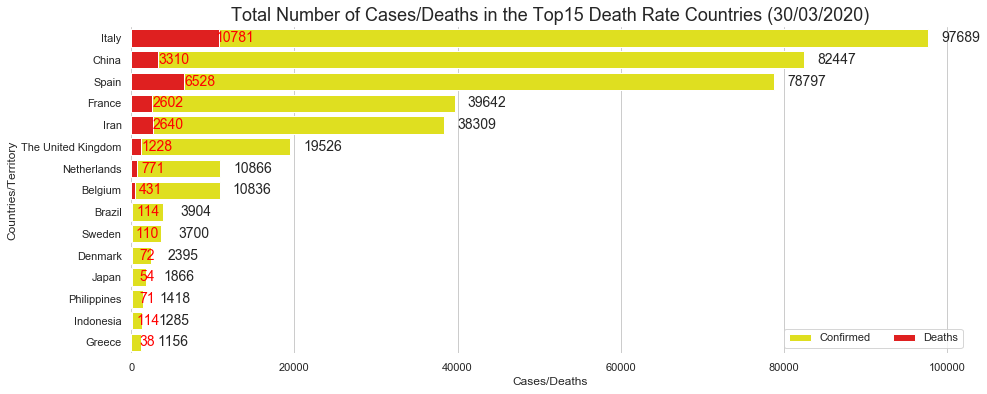

In [10]:
#seaborn defaults
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15_confirmed,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15_confirmed ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Death Rate Countries (30/03/2020)',fontsize=18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deaths[i]+1900, y=i , s=deaths[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmed[i]+4000, y=i , s=confirmed[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('Graphs/20200330_TotalNumberCasesDeaths.png', bbox_inches='tight')

In [11]:
dfDSLRC = df.sort_values(by=['Days since last reported case'],ascending=False)#dfDSLRC = dataframe Days since last reported case
dfDSLRC[0:30]

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Transmission Classification,Days since last reported case,Death Rate
144,Saint Vincent and the Grenadines,1,0,0,0,Imported cases only,17,0.000000
139,Guyana,5,0,1,0,Local transmission,11,20.000000
14,Papua New Guinea,1,0,0,0,Imported cases only,9,0.000000
88,Timor-Leste,1,0,0,0,Under investigation,9,0.000000
198,Angola,2,0,0,0,Imported cases only,8,0.000000
197,Liberia,3,0,0,0,Local transmission,8,0.000000
175,Kenya,25,0,1,0,Local transmission,5,4.000000
199,Guinea-Bissau,2,0,0,0,Imported cases only,4,0.000000
143,Belize,2,0,0,0,Local transmission,4,0.000000
152,Cayman Islands,8,0,1,0,Imported cases only,4,12.500000


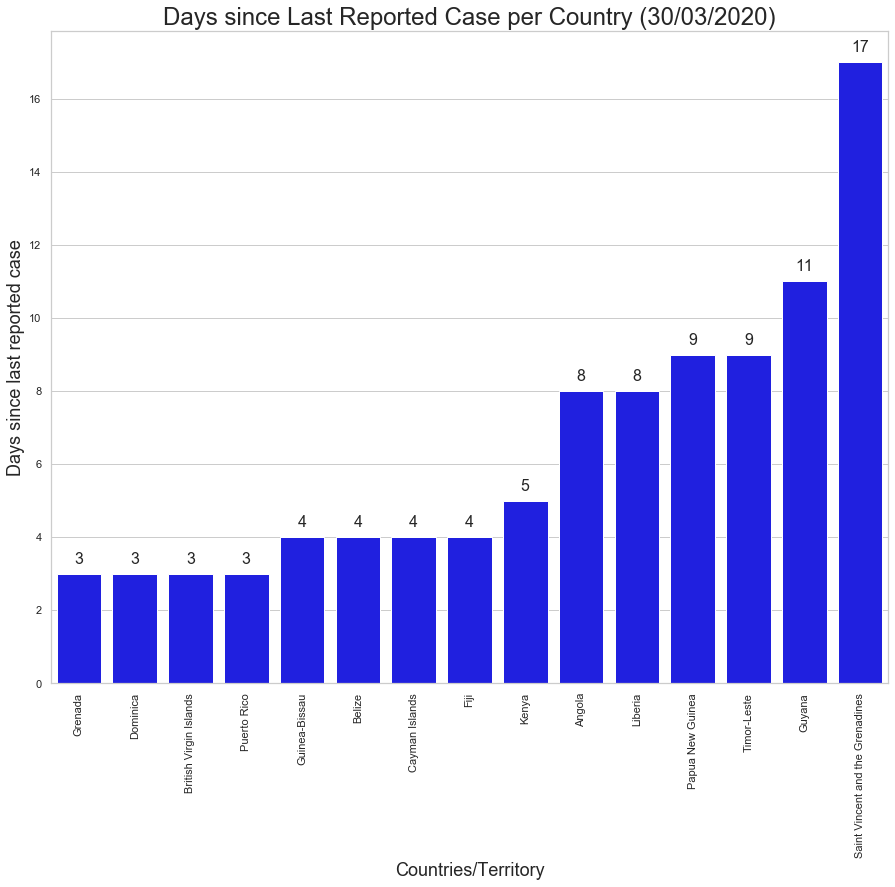

In [12]:
#seaborn defaults
top15DSLRC = dfDSLRC[0:15].sort_values(by=['Days since last reported case'])
DSLRC = top15DSLRC['Days since last reported case']

f, ax = plt.subplots(figsize=(15, 12))
sns.set(style="whitegrid")
sns.set_color_codes("muted")
sns.barplot(x='Country/Territory',y='Days since last reported case', data=top15DSLRC ,
            label="Days since last reported case", color="blue")
plt.title('Days since Last Reported Case per Country (30/03/2020)',fontsize=24)
plt.ylabel('Days since last reported case',fontsize=18)
plt.xlabel('Countries/Territory',fontsize=18)
plt.xticks(rotation='vertical')
for i in range (0,15):
    plt.text(x=i, y=DSLRC.iloc[i]+0.4 , s=DSLRC.iloc[i],horizontalalignment='center',verticalalignment='center', fontsize=16)
plt.savefig('Graphs/20200330_DaysSinceLast.png', bbox_inches='tight')
plt.show()

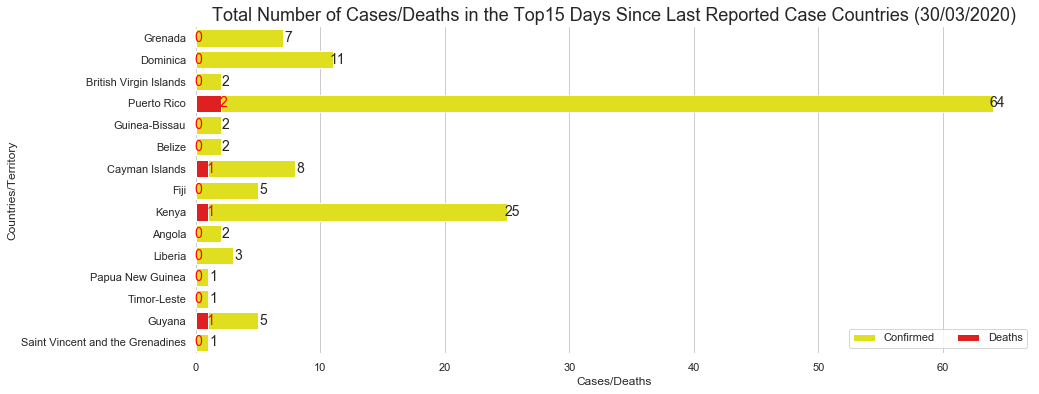

In [13]:
#seaborn defaults
confirmedDSLRC = np.array(top15DSLRC['Total Confirmed'])
deathsDSLRC = np.array(top15DSLRC['Total Deaths'])
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(15, 6))


sns.set_color_codes("pastel")
sns.barplot(x='Total Confirmed',y='Country/Territory', data=top15DSLRC,
            label="Confirmed", color="yellow")
sns.set_color_codes("muted")
sns.barplot(x='Total Deaths',y='Country/Territory', data=top15DSLRC ,
            label="Deaths", color="red")


plt.title('Total Number of Cases/Deaths in the Top15 Days Since Last Reported Case Countries (30/03/2020)',fontsize=18)
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Countries/Territory",
       xlabel="Cases/Deaths")
for i in range (0,15):
    plt.text(x=deathsDSLRC[i]+0.2, y=i , s=deathsDSLRC[i],horizontalalignment='center',verticalalignment='center', color='red',fontsize=14)
    plt.text(x=confirmedDSLRC[i]+0.4, y=i , s=confirmedDSLRC[i],horizontalalignment='center',verticalalignment='center', fontsize=14)
sns.despine(left=True, bottom=True)
plt.savefig('Graphs/20200330_TotalNumberCasesDeathsDSLRC.png', bbox_inches='tight')

In [14]:
Transmission_type = pd.get_dummies(df, columns=['Transmission Classification'])
Transmission_type

,Country/Territory,Total Confirmed,New Cases,Total Deaths,New Deaths,Days since last reported case,Death Rate,Transmission Classification_Imported cases only,Transmission Classification_Local transmission,Transmission Classification_Under investigation
107,Sudan,6,1,2,1,0,33.333333,1,0,0
196,Gambia,3,0,1,0,1,33.333333,1,0,0
140,Nicaragua,4,0,1,0,1,25.000000,1,0,0
195,Zimbabwe,5,0,1,0,2,20.000000,0,1,0
139,Guyana,5,0,1,0,11,20.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...
104,Djibouti,19,4,0,0,0,0.000000,0,1,0
102,Oman,167,0,0,0,1,0.000000,0,1,0
88,Timor-Leste,1,0,0,0,9,0.000000,0,0,1
87,Bhutan,4,1,0,0,0,0.000000,1,0,0


In [15]:
print('The number of countries with only imported cases is:',Transmission_type['Transmission Classification_Imported cases only'].sum())

The number of countries with only imported cases is: 39


In [16]:
print('The number of countries with local transmissions cases is:',Transmission_type['Transmission Classification_Local transmission'].sum())

The number of countries with local transmissions cases is: 154


In [17]:
print('The number of countries under investigation to determine the type of transmission is:',Transmission_type['Transmission Classification_Under investigation'].sum())

The number of countries under investigation to determine the type of transmission is: 9
